In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error

In [4]:
df=pd.read_csv('/content/AirPassengers.csv')

In [5]:
df=df.rename(columns={'Month':'ds','#Passengers':'y'})

In [6]:
df.head()

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [7]:
df['y_orig']=df['y']

In [8]:
df['y']=np.log(df['y'])

In [9]:
df.head()

,ds,y,y_orig
0,1949-01,4.718499,112
1,1949-02,4.770685,118
2,1949-03,4.882802,132
3,1949-04,4.859812,129
4,1949-05,4.795791,121


In [10]:
model=Prophet()
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [11]:
future_data=model.make_future_dataframe(periods=12,freq='M')

/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [12]:
forecast_data=model.predict(future_data)

In [13]:
forecast_data.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,4.803592,4.669482,4.761683,4.803592,4.803592,-0.089162,-0.089162,-0.089162,-0.089162,-0.089162,-0.089162,0.0,0.0,0.0,4.714431
1,1949-02-01,4.808895,4.661714,4.753498,4.808895,4.808895,-0.100764,-0.100764,-0.100764,-0.100764,-0.100764,-0.100764,0.0,0.0,0.0,4.708131
2,1949-03-01,4.813685,4.790350,4.880662,4.813685,4.813685,0.021847,0.021847,0.021847,0.021847,0.021847,0.021847,0.0,0.0,0.0,4.835532
3,1949-04-01,4.818988,4.772136,4.862978,4.818988,4.818988,-0.002464,-0.002464,-0.002464,-0.002464,-0.002464,-0.002464,0.0,0.0,0.0,4.816523
4,1949-05-01,4.824119,4.770960,4.862807,4.824119,4.824119,-0.008961,-0.008961,-0.008961,-0.008961,-0.008961,-0.008961,0.0,0.0,0.0,4.815158


In [14]:
forecast_data[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
151,1961-07-31,6.486452,6.440645,6.534985
152,1961-08-31,6.365586,6.318702,6.414110
153,1961-09-30,6.207936,6.157916,6.258629
154,1961-10-31,6.073875,6.023992,6.126834
155,1961-11-30,6.215311,6.165521,6.264733


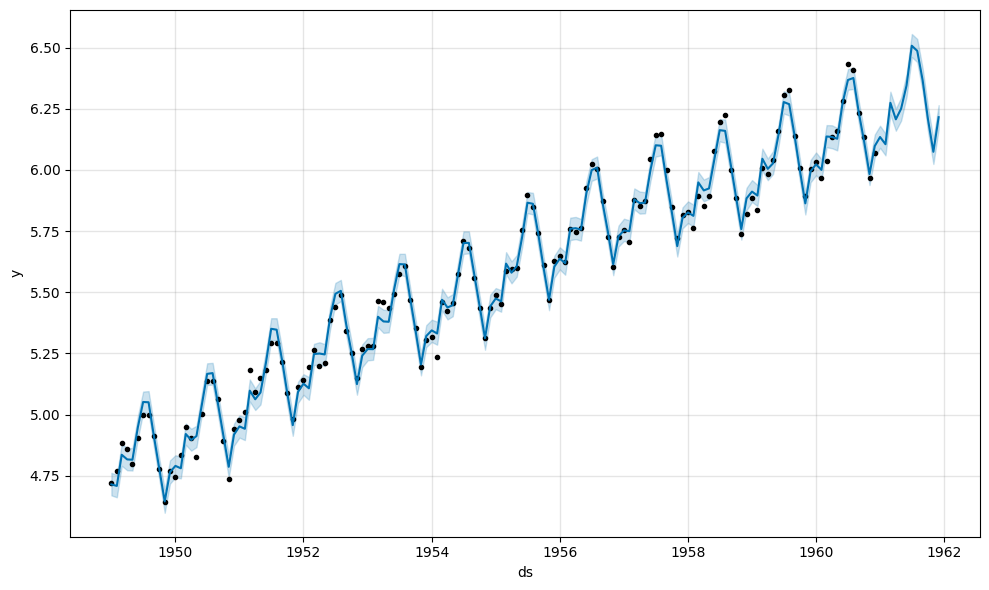

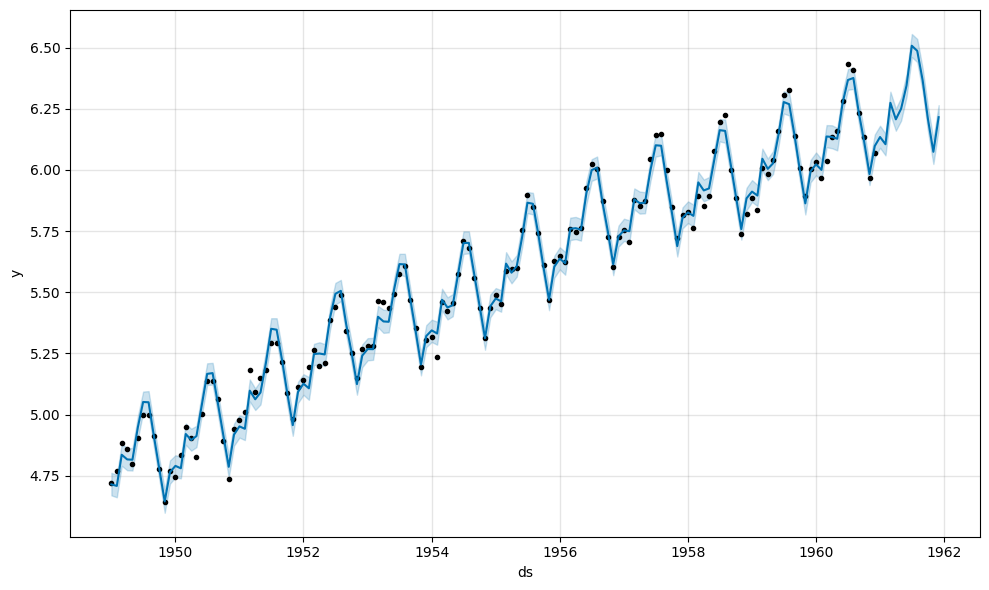

In [16]:
model.plot(forecast_data)

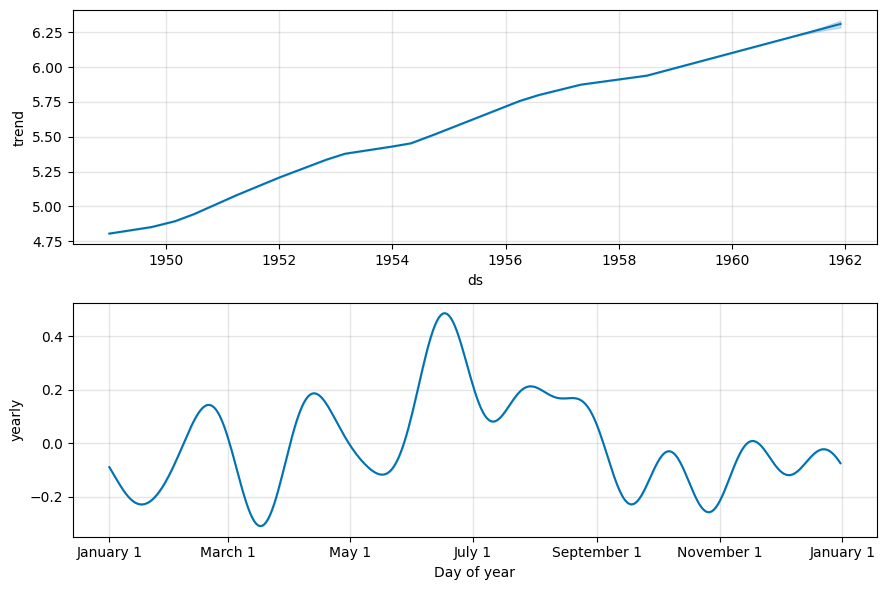

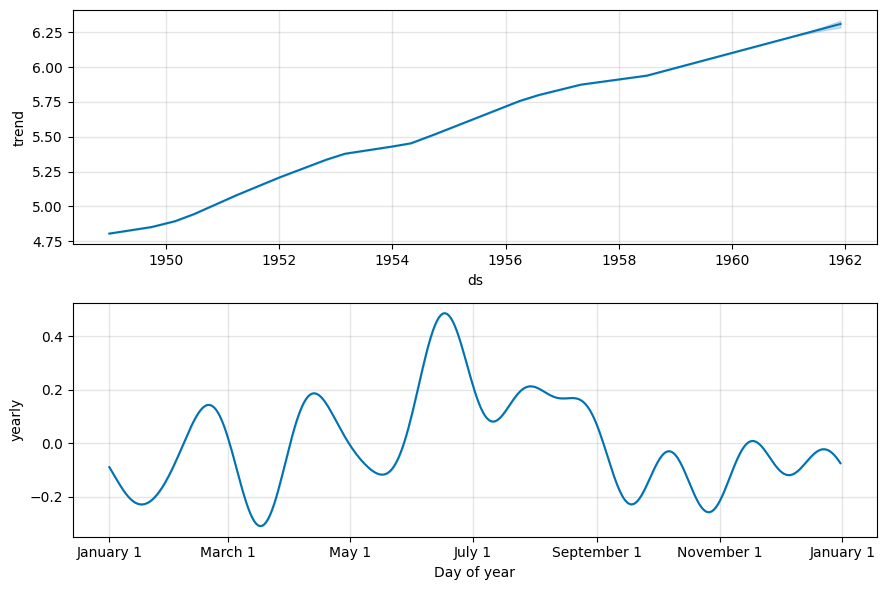

In [15]:
model.plot_components(forecast_data)

In [17]:
forecast_data_orig=forecast_data
forecast_data_orig['yhat']=np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower']=np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper']=np.exp(forecast_data_orig['yhat_upper'])

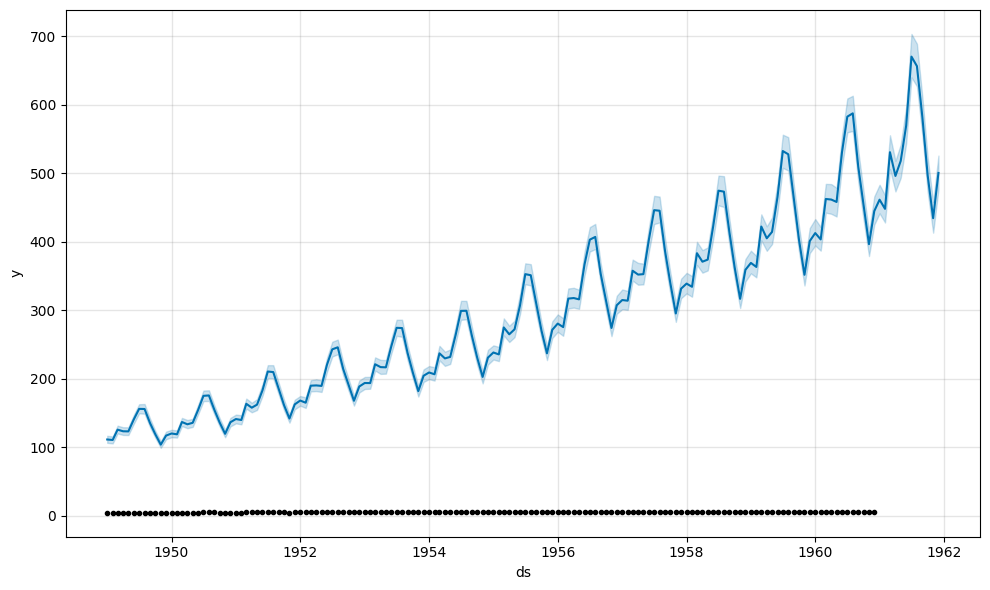

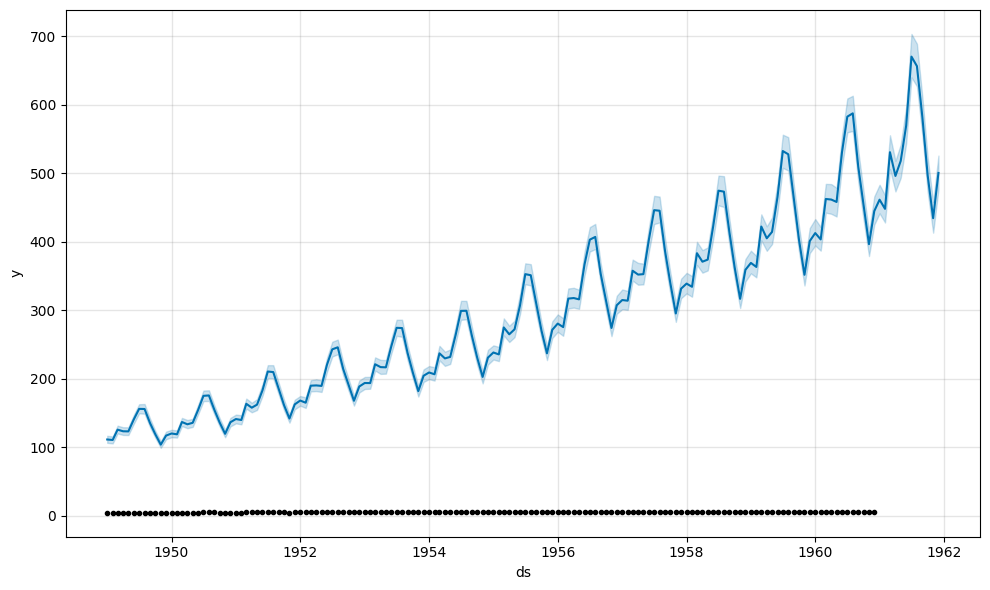

In [18]:
model.plot(forecast_data_orig)

In [19]:
df['y_log']=df['y']
df['y']=df['y_orig']

In [21]:
final_df=pd.DataFrame(forecast_data_orig)

In [22]:
import plotly.graph_objs as go
import plotly.offline as py

In [23]:
actual_chart=go.Scatter(y=df['y_orig'],name='Actual')
predict_chart=go.Scatter(y=final_df['yhat'],name='Predicted')
predict_chart_upper=go.Scatter(y=final_df['yhat_upper'],name='Predicted Upper')
predict_chart_lower=go.Scatter(y=final_df['yhat_lower'],name='Predicted Lower')
py.plot([actual_chart,predict_chart,predict_chart_lower,predict_chart_upper],image_width=400,image_height=400)

'temp-plot.html'